In [1]:
import Markov_Models as mm

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Generate  random data

Let's create 10 simulations with 2 random variables (features). We'll define minima and have simulations randomly select a minima to start each simulation from. I've set it up to be a fair selection (uniform distribution), but you can play with this to change the distribution shape. Once we've made our random data, we'll initialize our **`MSM`** object. There are a lot of ways to generate random data, but I'm using `numpy` because it's fast as well as easy.

In [22]:
minima = [[-0.5, 0], [0, -0.5], [0.5, 0], [0, 0.5]]
N = len(minima)
states = np.random.choice(np.arange(N), p=[1/N for i in range(N)], size=10)

data = [np.random.normal(loc=minima[states[i]], scale=0.2, size=(1000000, 2)) for i in range(10)]

In [23]:
model = mm.MSM(data)

# Base Class **`(Markov_Model.MSM)`** Attributes
There are several attributes, and callable functions stored within the default model **`MSM`** object. A particularly useful one is the **`MSM.histogram`** function, which we can use to calculate the distribution. For visualization of the FES with `matplotlib`, we can define the range of the histogram matrix by the **`MSM.extent`**

In [24]:
his0 = model.histogram(0, bins=50)
his1 = model.histogram(1, bins=50)
his = model.histogram(bins=50)

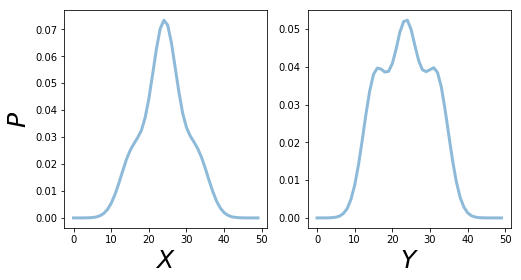

In [25]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(his0/his0.sum(), linewidth=3, alpha=0.5)
plt.xlabel(r'$X$', fontsize=25)
plt.ylabel(r'$P$', fontsize=25)

plt.subplot(1,2,2)
plt.plot(his1/his1.sum(), linewidth=3, alpha=0.5)
plt.xlabel(r'$Y$', fontsize=25)

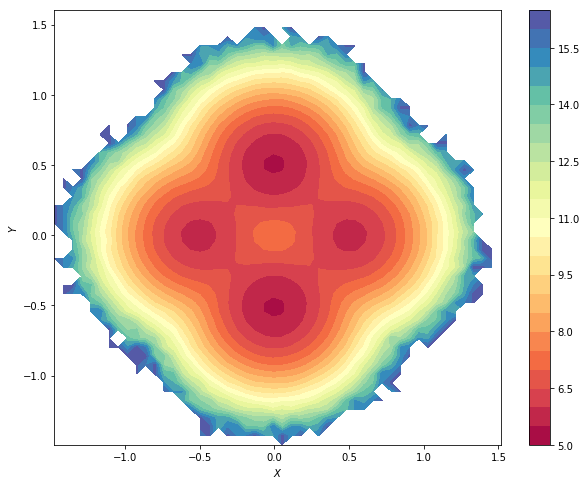

In [81]:
plt.figure(figsize=(10,8))
plt.contourf(-np.ma.log(his.T/his.sum()), 25, cmap=plt.cm.Spectral, extent=model.extent)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.colorbar()

# Fitting microstate model  **`(MSM.microstates.fit)`**

The method uses *k-means++* by default to generate 100 centroids **`(MSM.microstates.centroids)`**, fitting to 10% (**`fraction=0.1`**) of the simulation data.
For very large models, it may be necessary to clustering using the batch method *K-Means Mini Batch*.

In [29]:
model.microstates.fit(100, fraction=1e-2, lag=100, method='MiniBatchKMeans')

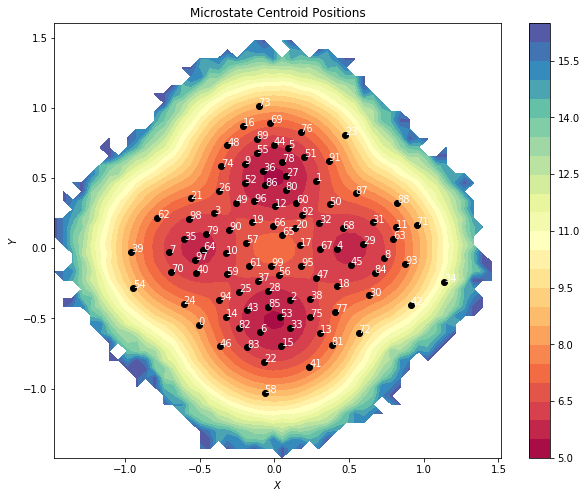

In [82]:
plt.figure(figsize=(10,8))
plt.title('Microstate Centroid Positions')
plt.contourf(-np.ma.log(his.T/his.sum()), 25, cmap=plt.cm.Spectral, extent=model.extent)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.colorbar()

plt.plot(model.microstates.centroids[:,0], 
             model.microstates.centroids[:,1], 
             'o', color='k')
for i in range(model.n_microstates):
    plt.text(model.microstates.centroids[i,0], 
             model.microstates.centroids[i,1], 
             i, color='w')

# Check microstate attributes

We now have several attributes to our microstate model (**`model.microstates`**), containing the **`lag`**, **`centroids`**, **`count_matrix`**, **`transition_matrix`**. Additionally, we have our microstate **`labels`** of the data, which stores the discrete microstate time-dependently.

In [31]:
print('The system lag time is '+str(model.microstates.lag)+' time steps')

The system lag time is 100 time steps


In [32]:
model.microstates.labels

[array([86, 50, 36, ...,  1, 19, 65], dtype=int32),
 array([45, 18, 88, ..., 29, 45,  8], dtype=int32),
 array([22,  6, 37, ..., 28, 13, 22], dtype=int32),
 array([41, 75, 22, ...,  2,  2, 53], dtype=int32),
 array([97,  0, 39, ..., 59, 70,  7], dtype=int32),
 array([31, 67, 11, ...,  4, 30, 32], dtype=int32),
 array([50, 19, 96, ..., 49, 76, 78], dtype=int32),
 array([74, 76,  1, ..., 44, 26, 27], dtype=int32),
 array([46, 56,  6, ..., 33, 15,  2], dtype=int32),
 array([79, 10, 21, ..., 97, 35, 10], dtype=int32)]

# Predict microstates **`(MSM.microstates.predict)`**

We can predict what states, new data would be assigned using the **`predict`** method. Below, I've shown the assignment for randomly generated data.

In [33]:
model.microstates.predict(np.random.randn(25,2))

array([61, 72, 58, 24, 54, 34, 58, 73, 63, 88, 58, 23, 58, 42, 94, 34, 39,
       71, 57, 88, 58, 54, 17, 86, 48])

# Calculate microstate kinetics

In addition to the attributes, we also have a few functions that allow us to calculate the spectral decomposition of **`eigenvalues`**, **`left_eigenvectorss`**, and **`right_eigenvectorss`**. The implied timescales is calculated through pyemma, while **`MSM.microstates.timescales`** can be used, it may be easier to directly use `MSMBuilder`, `PyEMMA`, all of the analysis are calculated using `msmtools`.

In [34]:
model.microstates.eigenvalues(10)

array([ 1.        ,  0.89314624,  0.84759997,  0.75615667, -0.0051462 ,
        0.00438146, -0.00415582,  0.00410685,  0.00390234, -0.00387402])

In [35]:
model.microstates.left_eigenvector(2)[:10,:]

array([[ 0.0031632 , -0.00300947],
       [ 0.01609128,  0.02051178],
       [ 0.01889836, -0.02481237],
       [ 0.00945093,  0.0025631 ],
       [ 0.01597982, -0.0004324 ],
       [ 0.00820296,  0.01123121],
       [ 0.02225625, -0.03026619],
       [ 0.01318375,  0.00019968],
       [ 0.00831654, -0.00017184],
       [ 0.01092375,  0.0148493 ]])

In [36]:
model.microstates.right_eigenvector(2)[:10,:]

array([[ 1.        , -0.95140141],
       [ 1.        ,  1.27471349],
       [ 1.        , -1.31293765],
       [ 1.        ,  0.27120064],
       [ 1.        , -0.0270594 ],
       [ 1.        ,  1.36916589],
       [ 1.        , -1.35989619],
       [ 1.        ,  0.01514615],
       [ 1.        , -0.02066247],
       [ 1.        ,  1.35935983]])

In [37]:
model.microstates.timescales(lags=[10,20,30,40,50,60,70,80,90,100], k=1)

array([[  88.578124  ],
       [ 176.98741572],
       [ 265.70169752],
       [ 354.33191439],
       [ 442.62200866],
       [ 531.15367331],
       [ 619.6170685 ],
       [ 708.75637632],
       [ 796.64735014],
       [ 884.91691051]])

In [51]:
its = model.microstates.timescales(k=50)
sep = its[0,:-1]/its[0,1:]

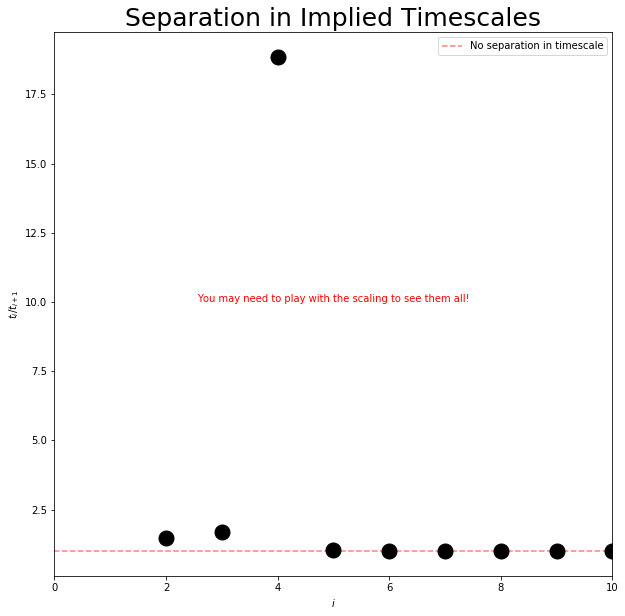

In [70]:
plt.figure(figsize=(10,10))
plt.title('Separation in Implied Timescales', fontsize=25)
plt.text(5, 10, 'You may need to play with the scaling to see them all!', color='r', fontsize=10, horizontalalignment='center')
plt.hlines(1, 0, 10, linestyles='--', color='r', alpha=0.5, label='No separation in timescale')
plt.plot(np.arange(2,51), sep, 'o', color='k', markersize=15)
plt.xlabel(r'$i$')
plt.ylabel(r'${t_{i}}/{t_{i+1}}$')
plt.xlim(0,10)
plt.legend()

# Fit Macrostates Model **`(MSM.macrostates.fit)`**

In the previous calculation we saw there were 3 large separations in timescale, therefore we can expect a 4 macrostate model. The method we use to coarse-grain is *Robust Perron Cluster Analysis (PCCA++)*. This is set as the default method to cluster microstate centroids **`(MSM.microstates.centroids)`**. I've additionally implemented a clustering method using *Hidden Markov Models* and *Gaussian Mixture Models* which can be selected by setting `method=HMM` or `method=GMM` respectively, however these have not been thoroughly tested. 

You'll notice many of the same attributes present in **`MSM.microstates`** is available for **`MSM.macrostates`**. These perform the same methods, but are performed for micro and macroscopic models.

In [71]:
model.macrostates.fit(4, method='PCCA')

In [72]:
model.macrostates.transition_matrix

array([[ 0.81196017,  0.0056581 ,  0.09105921,  0.09132252],
       [ 0.00584748,  0.81826139,  0.09120542,  0.08468571],
       [ 0.0655859 ,  0.06356365,  0.86375638,  0.00709407],
       [ 0.06332421,  0.05682031,  0.00682969,  0.8730258 ]])

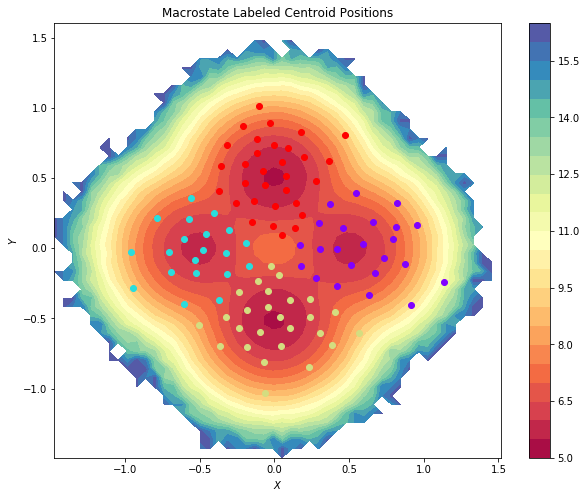

In [78]:
plt.figure(figsize=(10,8))
plt.title('Macrostate Labeled Centroid Positions')
plt.contourf(-np.ma.log(his.T/his.sum()), 25, cmap=plt.cm.Spectral, extent=model.extent)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.colorbar()

colors = plt.cm.rainbow(np.linspace(0, 1, model.n_macrostates))
s = model.macrostates.metastable_sets
for i in range(model.n_macrostates):
    plt.plot(model.microstates.centroids[s[i],0], 
             model.microstates.centroids[s[i],1], 
             'o', color=colors[i])

# Attributes specific to **`(MSM.macrostates)`**

Here, I'll list a few of the attributes that are specific to the **`macrostates`** object.

* **`metastable_labels`**: This contains the **crisp** assignments of each microstate to its corresponding macrostates
* **`metastable_sets`**: This is another form of storing **crisp** assignments. Neither is different, but some are easier to work with, depending on the situation.
* **`membership`**: Fuzzy membership probability for all microstates to belong in all macrostates. This attribute is not available if you coarse grain with *HMM*, as it is a result of the *PCCA++* method.
* **`score`**: This will calculate the Silhouette Score that estimates effectively how much overlap there is between the assignment of microstates to a specific macrostates. *PCCA++* tries to reduce this value by minimizing how *fuzzy* the memberships are, but expect some overlap to exist. -1 value means all macrostates elements are overlapping, and +1 means memberships are perfectly crisp.

In [79]:
model.macrostates.metastable_labels

array([3, 4, 3, 2, 1, 4, 3, 2, 1, 4, 2, 1, 4, 3, 3, 3, 4, 1, 1, 4, 4, 2, 3,
       4, 2, 3, 4, 4, 3, 1, 1, 1, 1, 3, 1, 2, 4, 3, 3, 2, 2, 3, 1, 3, 4, 1,
       3, 1, 4, 4, 1, 4, 4, 3, 2, 4, 3, 2, 3, 2, 4, 2, 2, 1, 2, 4, 4, 1, 1,
       4, 2, 1, 3, 4, 4, 3, 4, 3, 4, 2, 4, 3, 3, 3, 1, 3, 4, 1, 1, 4, 2, 4,
       4, 1, 2, 1, 4, 2, 2, 3])

In [80]:
model.macrostates.memberships[:10,:]

array([[  1.31823334e-03,   2.99342353e-01,   6.99339414e-01,
          0.00000000e+00],
       [  6.71221184e-02,   1.51203784e-03,   8.44416731e-04,
          9.30521427e-01],
       [  3.50585978e-02,   2.65207949e-03,   9.61618190e-01,
          6.71132430e-04],
       [  3.72371392e-04,   8.06330540e-01,   1.53469034e-03,
          1.91762398e-01],
       [  9.71788212e-01,   1.34137895e-03,   1.81635164e-02,
          8.70689281e-03],
       [  1.11211590e-03,   3.12751401e-04,   3.77059553e-04,
          9.98198073e-01],
       [  1.38619858e-03,   1.81604658e-03,   9.96239452e-01,
          5.58302535e-04],
       [  2.91667132e-04,   9.97787229e-01,   2.68040252e-05,
          1.89429969e-03],
       [  9.91975766e-01,   1.32077742e-03,   5.61226616e-03,
          1.09119078e-03],
       [  1.19433302e-03,   7.59971960e-03,   2.98547895e-04,
          9.90907399e-01]])